# Telco Customer Churn - EDA and Preprocessing

## 1. Introduction
In this notebook, we will perform Exploratory Data Analysis (EDA) and data preprocessing on the Telco Customer Churn dataset. The goal is to understand the data, identify patterns, and prepare the dataset for modeling.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
if not os.path.exists('images'):
    os.makedirs('images')


## 2. Load and Inspect Data

In [2]:
df = pd.read_csv('data/raw/Telco-Customer-Churn.csv')


In [3]:
# Display first few rows
display(df.head())
display(df.info())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

## 3. Data Cleaning


In [4]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values
print(df.isnull().sum())

# Fill missing TotalCharges with 0 (assuming new customers) 
# Checking rows with null TotalCharges
display(df[df['TotalCharges'].isnull()])

# It seems these are customers with tenure=0. We can fill with 0.
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Drop customerID as it is not needed for prediction
df.drop('customerID', axis=1, inplace=True)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [21]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
TenureCategory      0
dtype: int64


## 4. Exploratory Data Analysis (EDA)

### 4.1 Target Variable Analysis (Class Imbalance)

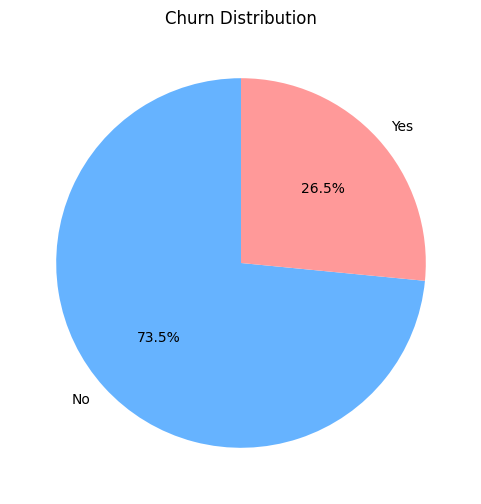

In [5]:
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.savefig('images/churn_distribution.png')
plt.show()

### 4.2 Univariate Analysis - Numerical Features

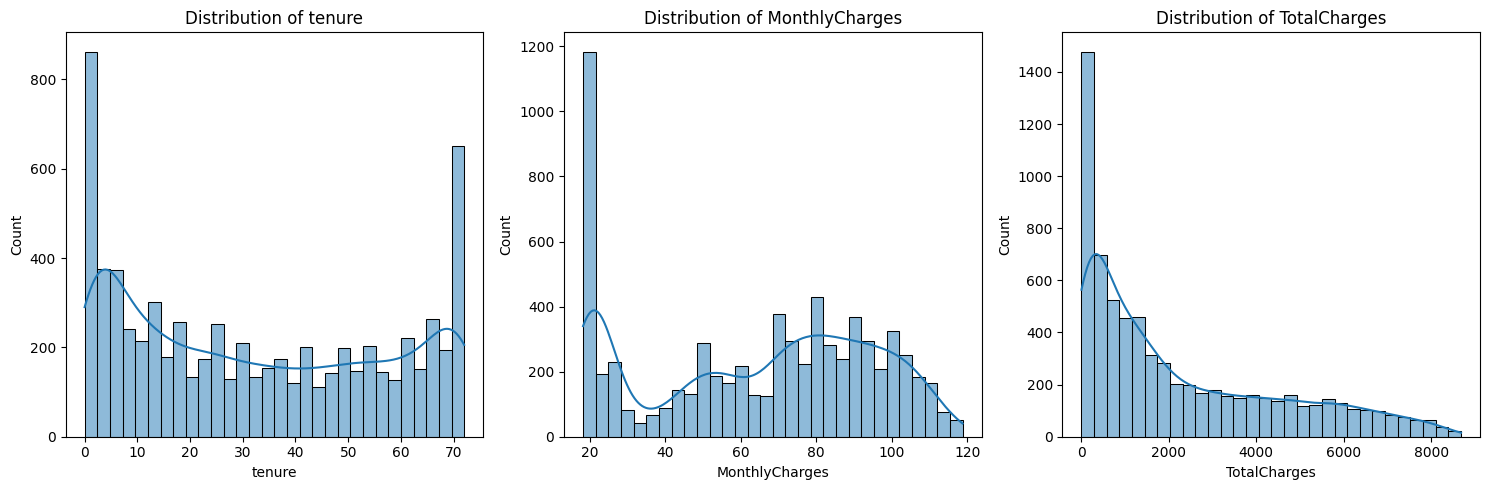

In [6]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('images/numerical_univariate.png')
plt.show()

### 4.3 Univariate Analysis - Categorical Features

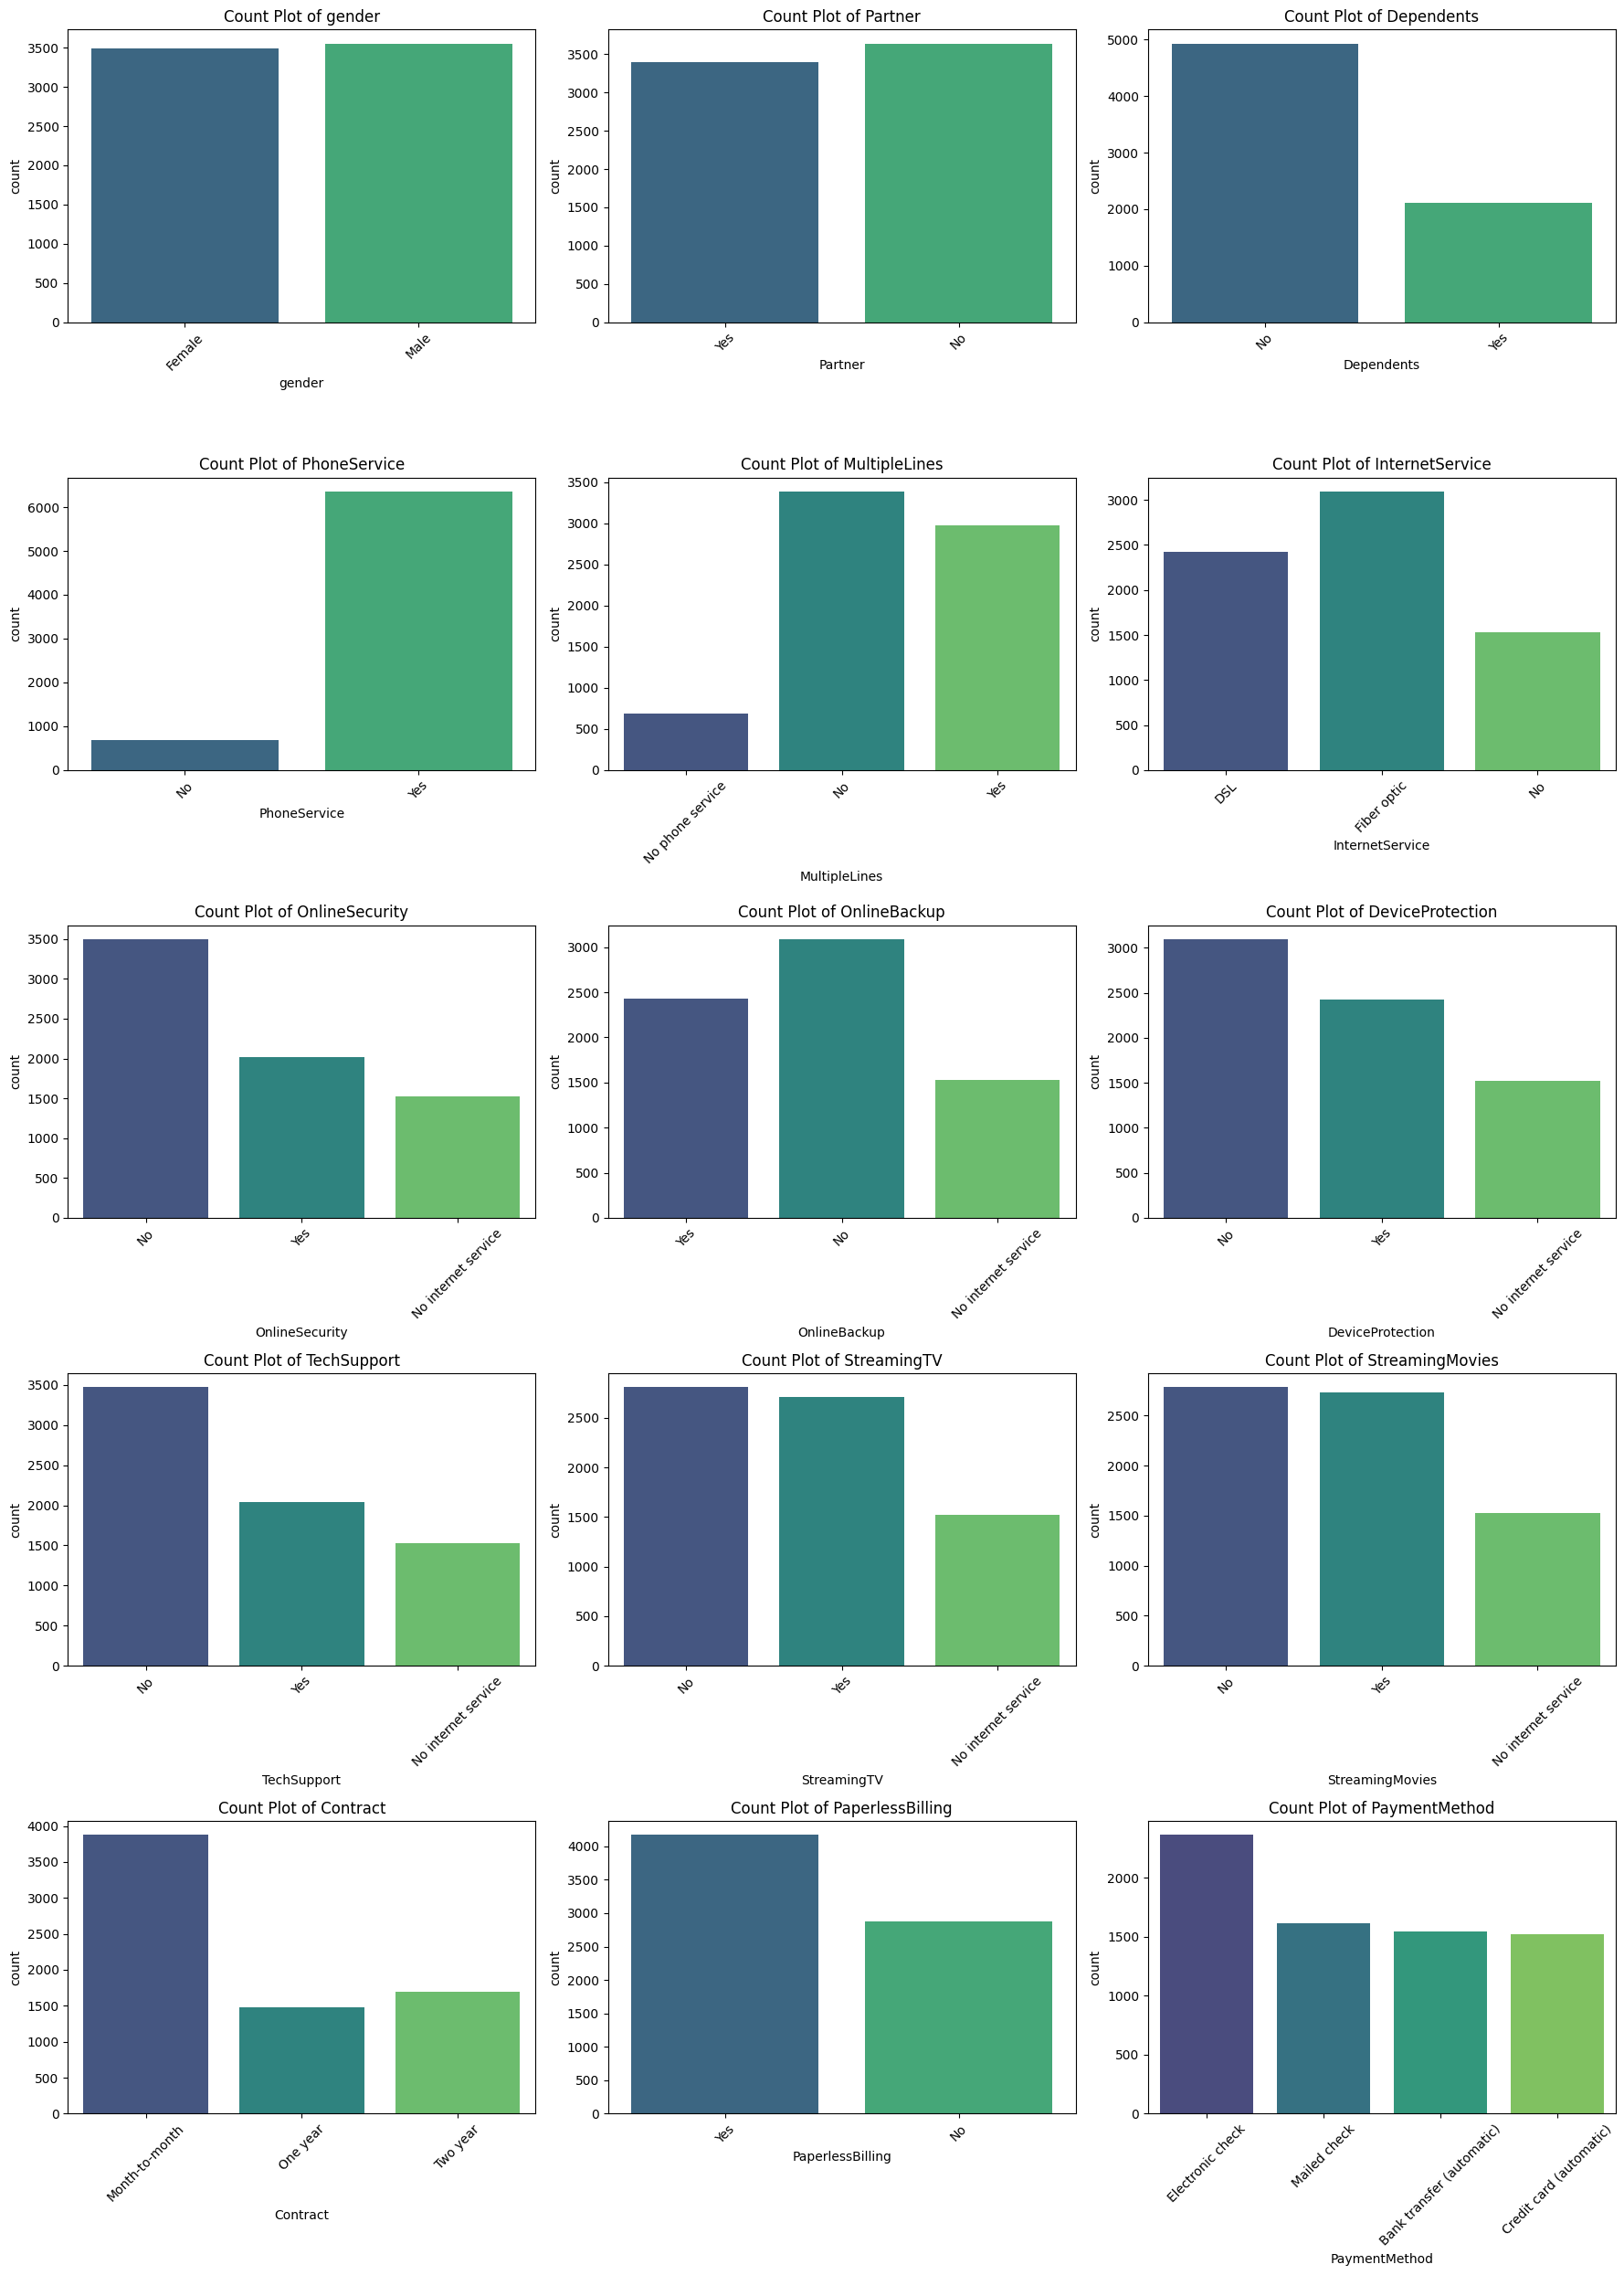

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns
cats_to_plot = [col for col in cat_cols if col != 'Churn']
n_cols = 3
n_rows = math.ceil(len(cats_to_plot) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cats_to_plot):
    sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/categorical_univariate.png')
plt.show()

### 4.4 Bivariate Analysis - Churn vs Features

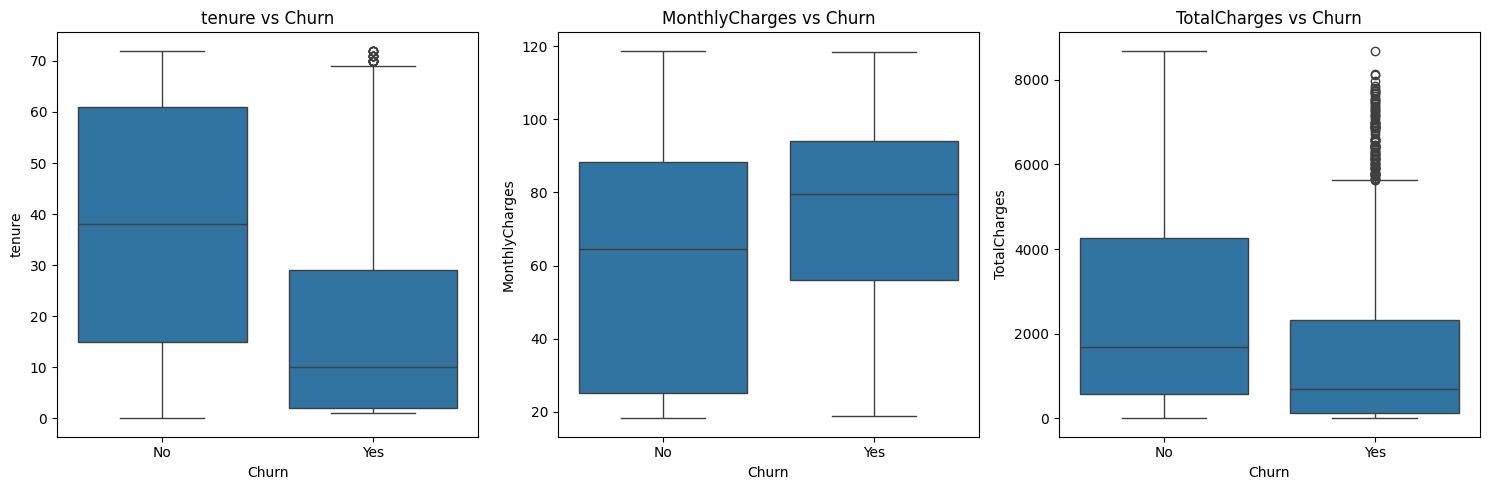

In [8]:
# Numerical vs Churn
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.savefig('images/numerical_churn_boxplots.png')
plt.show()

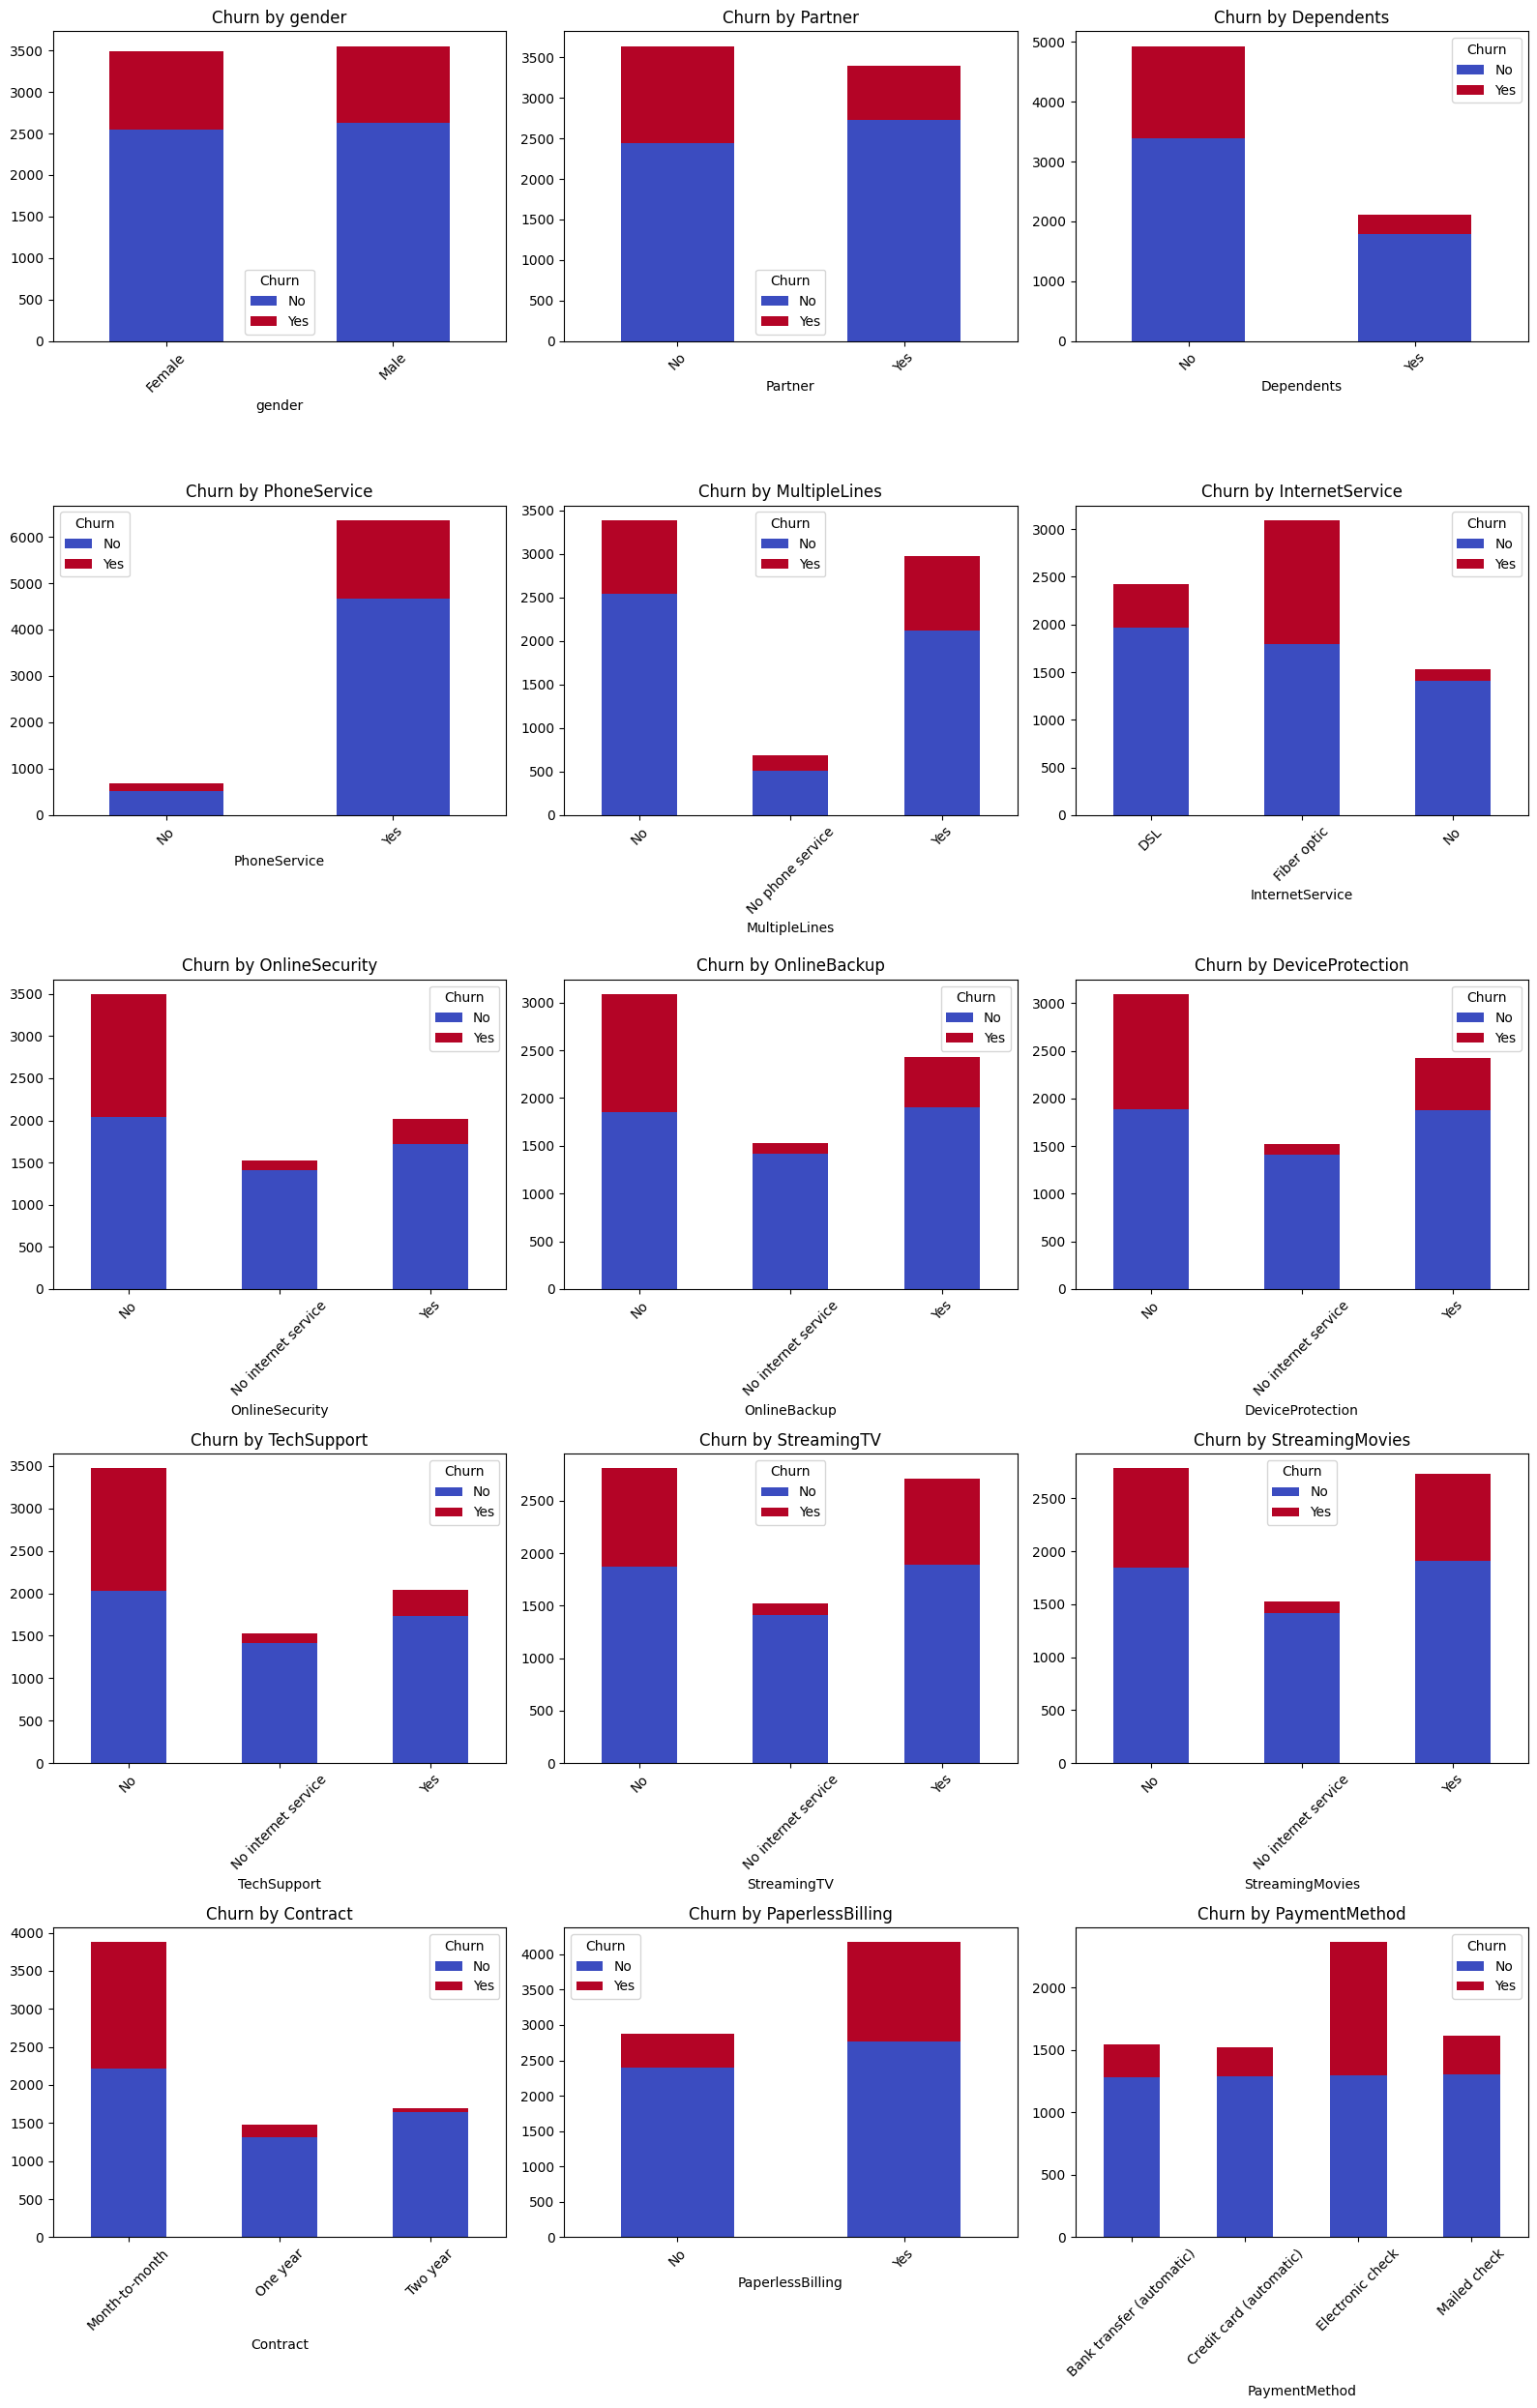

In [9]:
# Categorical vs Churn (Stacked Bars)
cats_to_plot = [col for col in cat_cols if col != 'Churn']
n_cols = 3
n_rows = math.ceil(len(cats_to_plot) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cats_to_plot):
    pd.crosstab(df[col], df['Churn']).plot(kind='bar', stacked=True, ax=axes[i], colormap='coolwarm')
    axes[i].set_title(f'Churn by {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/categorical_churn_bivariate.png')
plt.show()

### 4.5 Multivariate Analysis - Correlation

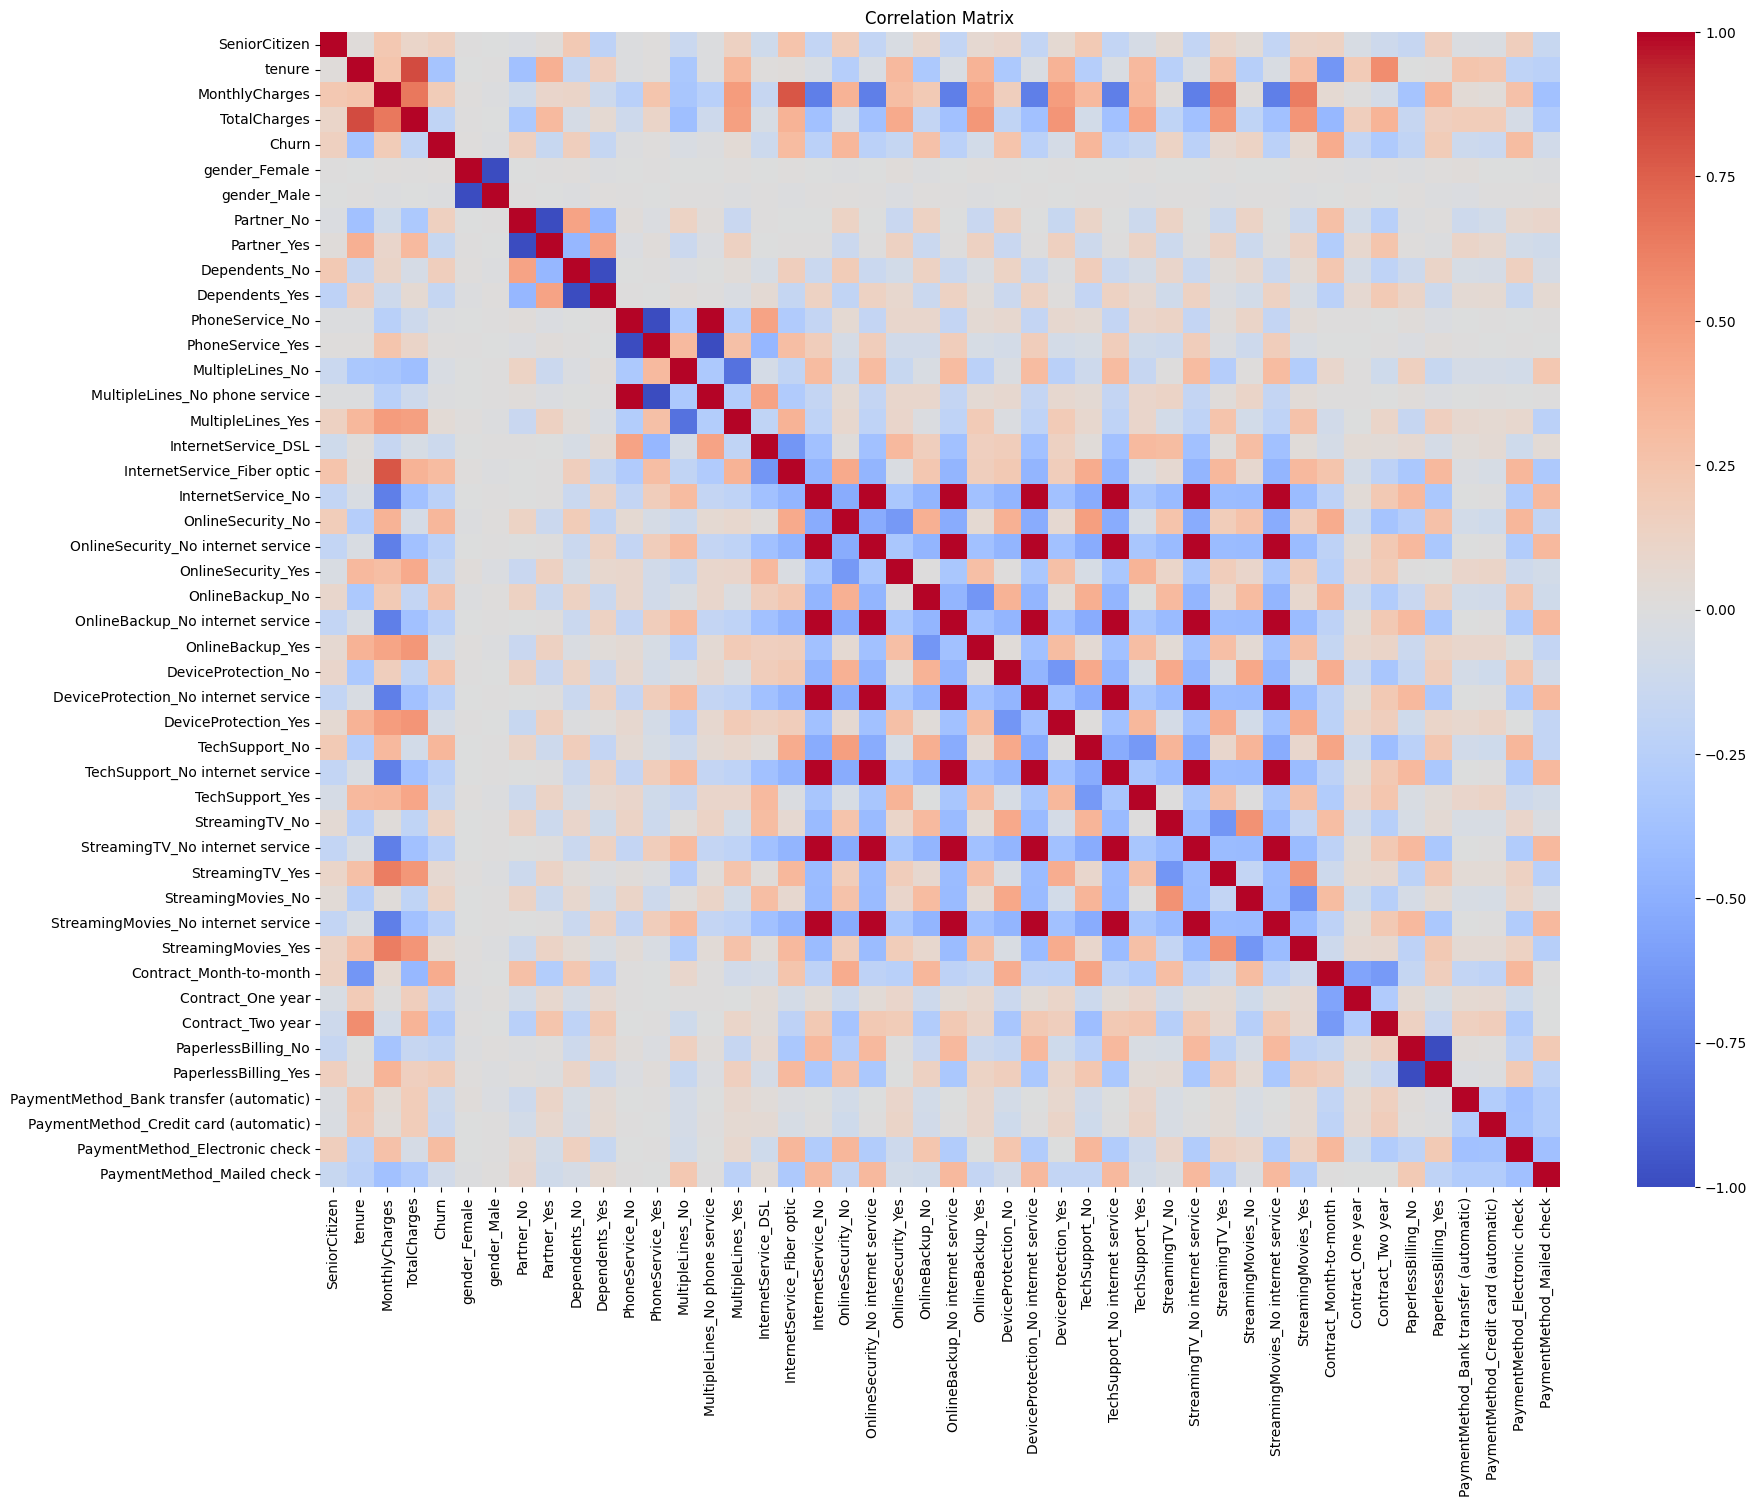

Churn                             1.000000
Contract_Month-to-month           0.405103
OnlineSecurity_No                 0.342637
TechSupport_No                    0.337281
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
OnlineBackup_No                   0.268005
DeviceProtection_No               0.252481
MonthlyCharges                    0.193356
PaperlessBilling_Yes              0.191825
Name: Churn, dtype: float64
TotalCharges                           -0.198324
TechSupport_No internet service        -0.227890
InternetService_No                     -0.227890
DeviceProtection_No internet service   -0.227890
OnlineBackup_No internet service       -0.227890
OnlineSecurity_No internet service     -0.227890
StreamingMovies_No internet service    -0.227890
StreamingTV_No internet service        -0.227890
Contract_Two year                      -0.302253
tenure                                 -0.352229
Name: Churn, dtype: float64


In [10]:
# Convert Churn to numeric for correlation
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode for full correlation matrix
df_corr = pd.get_dummies(df_corr)

plt.figure(figsize=(20, 15))
sns.heatmap(df_corr.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('images/correlation_matrix.png')
plt.show()

# Top correlations with Churn
churn_corr = df_corr.corr()['Churn'].sort_values(ascending=False)
print(churn_corr.head(10))
print(churn_corr.tail(10))

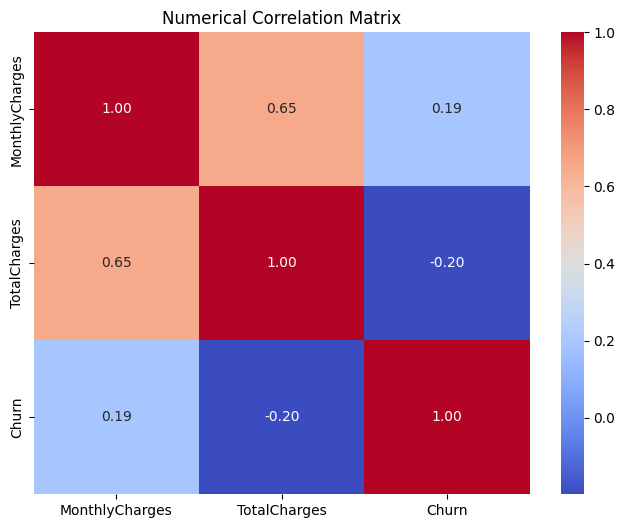

In [11]:
three = ['MonthlyCharges', 'TotalCharges', 'Churn']
corr_df = df[three].copy()
corr_df['Churn'] = corr_df['Churn'].map({'Yes': 1, 'No': 0})
corr_matrix = corr_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Numerical Correlation Matrix")
plt.savefig('images/num_correlation_matrix.png')
plt.show()

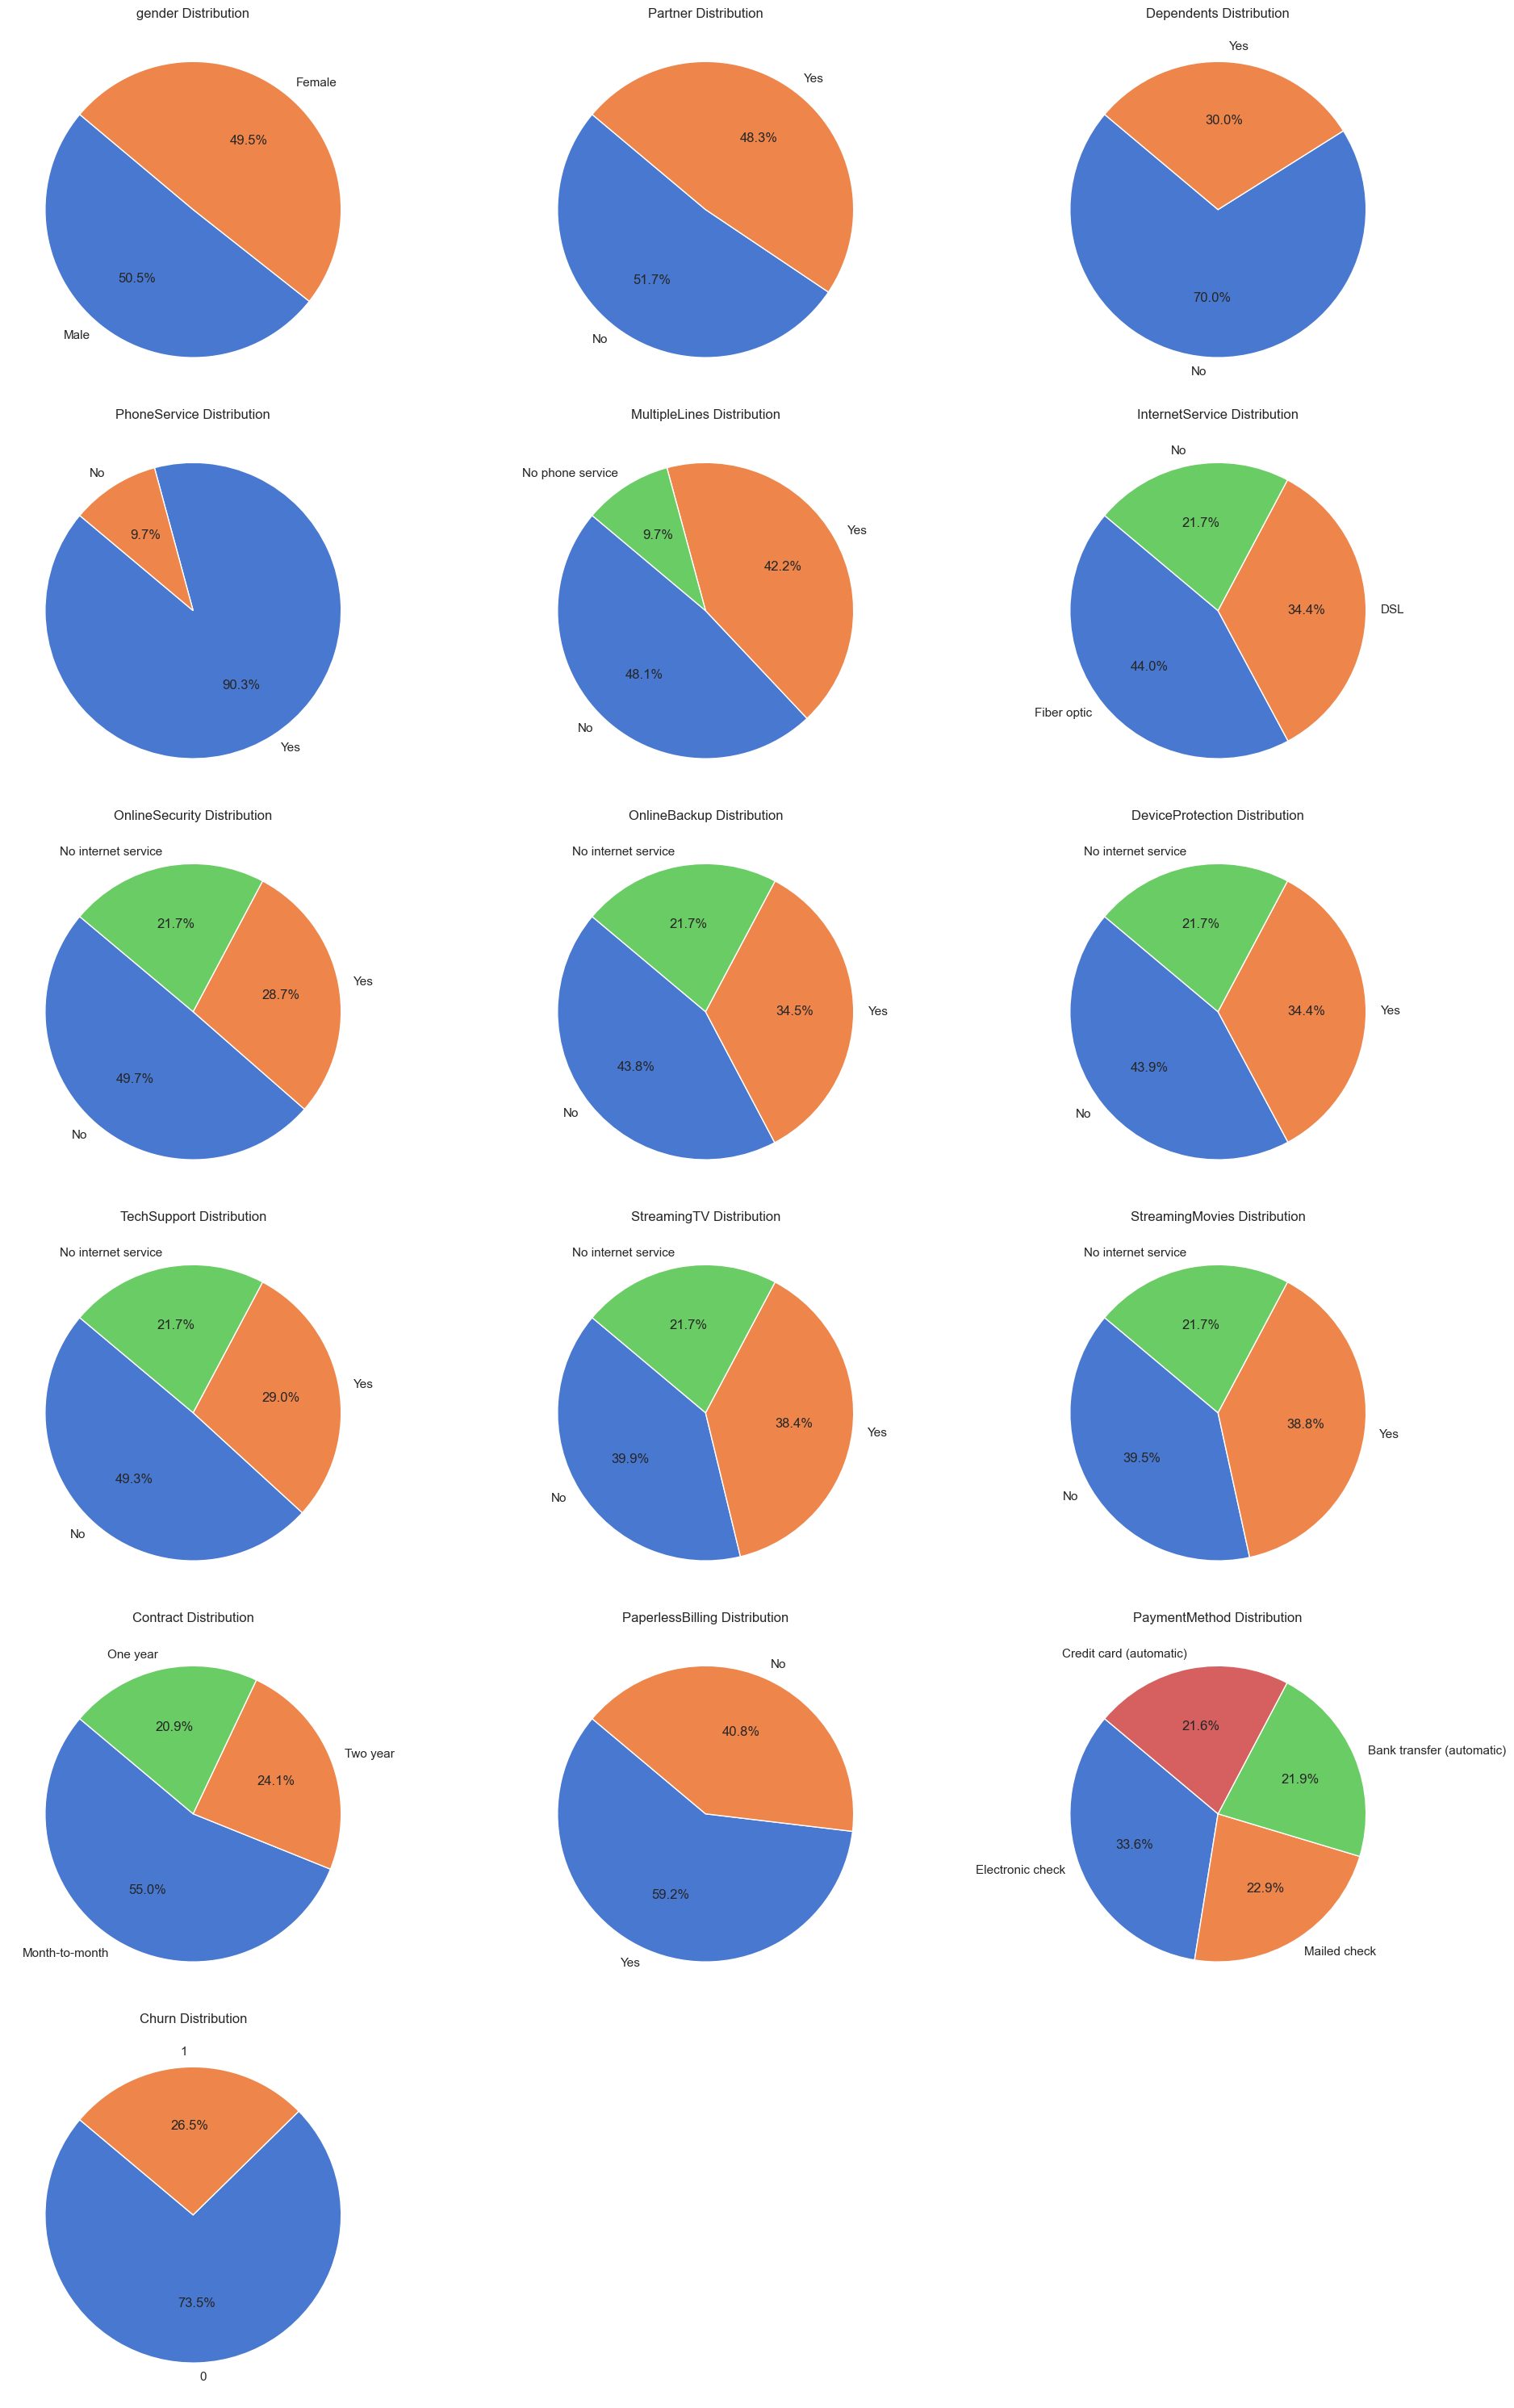

In [20]:
sns.set(style="whitegrid")

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
                colors=sns.color_palette("muted"))
    axes[i].set_title(f'{col} Distribution')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/distribution.png')
plt.show()

## 5 Outlier Identification

#### 5.1 Sigma Rule

In [13]:
def find_anomaly(data):
    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)

    return (data > upper_bound) | (data < lower_bound)
for col in num_cols:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df),3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

tenure : 0 outliers (0.0 %)
MonthlyCharges : 0 outliers (0.0 %)
TotalCharges : 0 outliers (0.0 %)


#### 5.2 IQR Method

In [14]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1 

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR 

    return (data > upper_bound) | (data < lower_bound)
for col in num_cols:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

tenure : 0 outliers (0.0 %)
MonthlyCharges : 0 outliers (0.0 %)
TotalCharges : 0 outliers (0.0 %)


## 6. Feature Engineering and Preprocessing

In [15]:
# Tenure Categories
def tenure_group(t):
    if t <= 12: return 'New'
    elif t <= 48: return 'Established'
    else: return 'Loyal'

df['TenureCategory'] = df['tenure'].apply(tenure_group)
print(df['TenureCategory'].value_counts())

TenureCategory
Established    2618
Loyal          2239
New            2186
Name: count, dtype: int64


In [16]:
# Determine columns to scale and encode
target = 'Churn'
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [c for c in df.columns if c not in numeric_features and c != target]

print(f"Numeric: {numeric_features}")
print(f"Categorical: {categorical_features}")

Numeric: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureCategory']


In [17]:
# Encoding
# Binary encoding for Churn
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# One-Hot Encoding for other categoricals
df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=False, dtype=int)

# Display processed dataframe
df_processed.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureCategory_Established,TenureCategory_Loyal,TenureCategory_New
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [18]:
# Split into X and y
X = df_processed.drop(target, axis=1)
y = df_processed[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (5634, 49)
Test shape: (1409, 49)


In [19]:
# Save processed data
import os
os.makedirs('data/processed', exist_ok=True)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('data/processed/train.csv', index=False)
test_data.to_csv('data/processed/test.csv', index=False)

print("Data saved to data/processed/")

Data saved to data/processed/
